# Importando biblioteca

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

# Sobre a base de dados

O conjunto de dados MNIST (Modified National Institute of Standards and Technology) é uma grande base de dados de dígitos manuscritos que é normalmente utilizada para treinar vários sistemas de processamento de imagem e modelos de aprendizagem automática. Foi criado através da "re-mistura" das amostras dos conjuntos de dados originais do NIST e tornou-se uma referência para avaliar o desempenho dos algoritmos de classificação de imagens.

# Características principais

. A MNIST contém 60.000 imagens de treino e 10.000 imagens de teste de dígitos manuscritos.  

. O conjunto de dados inclui imagens em escala de cinzentos de tamanho 28x28 pixéis.  

. As imagens são normalizadas para caberem numa caixa delimitadora de 28x28 pixéis e anti-aliased, introduzindo níveis de escala de cinzentos.  

. A MNIST é amplamente utilizada para treino e teste no domínio da aprendizagem automática, especialmente para tarefas de classificação de imagens.  


# Estrutura do conjunto de dados

O conjunto de dados MNIST está dividido em dois subconjuntos:

1. Conjunto de treino: Este subconjunto contém 60.000 imagens de dígitos manuscritos utilizados para treinar modelos de aprendizagem automática.
2. Conjunto de teste: Este subconjunto consiste em 10.000 imagens utilizadas para testar e avaliar os modelos treinados.


# Importação e Análise do Dataset

In [2]:
from tensorflow.keras.datasets import mnist

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
y_treino = pd.Series(data=y_treino)
dfreq = round(y_treino.value_counts()/len(y_treino)*100, 2)
dfreq.sort_index()

0     9.87
1    11.24
2     9.93
3    10.22
4     9.74
5     9.04
6     9.86
7    10.44
8     9.75
9     9.92
Name: count, dtype: float64

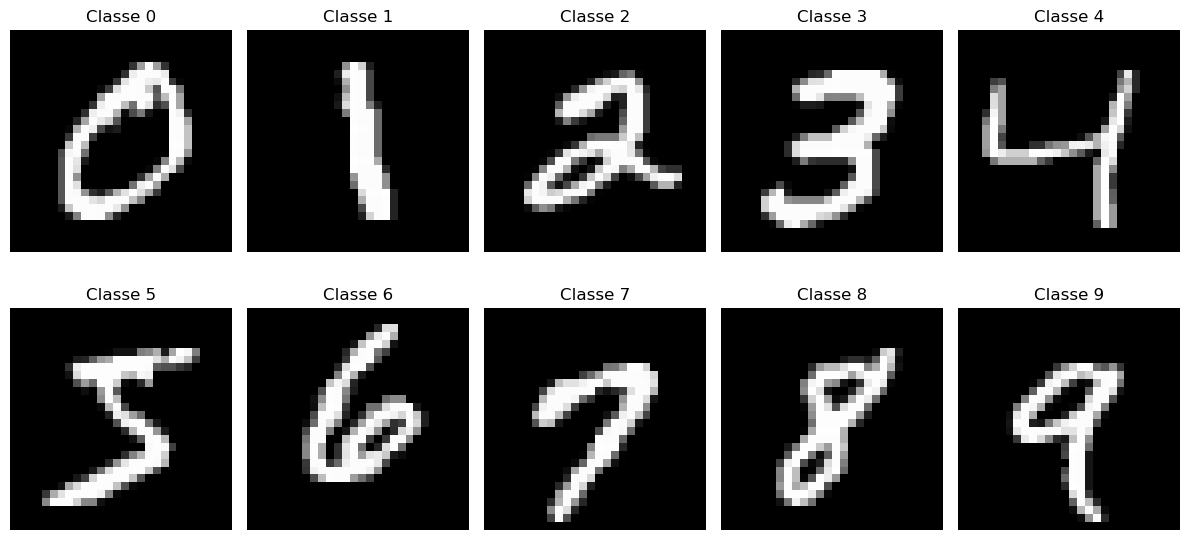

In [4]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
indices = [1, 6, 5, 7, 2, 0, 13, 15, 17, 4]

# Definindo o número de linhas e colunas para os subplots
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(x_treino[idx], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Classe {classes[i]}')

plt.tight_layout()
plt.show()

In [5]:
x_treino.shape, x_teste.shape

((60000, 28, 28), (10000, 28, 28))

# Normalização e pre-processamento dos dados

Pelo fato do dataset ja estar praticamente preparado para uso, só teremos uma etapa de pré-processamento que será a conversão dos dados de output de treino e teste em uma matriz com colunas sendo respectivas a cada categoria/classe presenta no dataset. A outra etapa será apenas uma normalização de valores. Como os pixeis estão entre valores entre 0 e 255, iremos normalizar dividindo o valor de um pixel x por 255 para que o valor de x fique entre 0 e 1 e daremos um reshape para transformar a matriz em um array que será correspondente a uma linha do dataframe

In [6]:
x_treino = x_treino.reshape((60000, 28*28)).astype('float32') / 255
x_teste = x_teste.reshape((10000, 28*28)).astype('float32') / 255

x_treino.dtype

dtype('float32')

In [7]:
x_treino

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.utils import to_categorical

y_treino = to_categorical(y_treino) 
y_teste = to_categorical(y_teste) 

y_treino, y_teste

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

# Sobre o modelo

Usando o dataset MINIST com imagens de 28X28 pixels, foi feita a seguinte rede neural:

.Uma Rede Neural DENSA cujo objetivo é classificar a que classe (numeros de 0 a 9) pertence cada imagem dentro do dataset  
.Foi utilizada a função de ativação ReLu para as camadas ocultas, e para a camada de saída foi utilizada a softmax  
.A rede neural possui 784 neuronios na camada de entrada pelo fato de possuir 784 pixeis em cada imagem(28*28)  
.Possui duas camada ocultas com 30 neuronios  
.E a camada de saída com 10 neuronios respectivos a quantidade de classes(numeros de 0 a 9) que temos na saída y do dataset   
.Como otimizadores verificaremos a perfomance do gradiente
.A função de custo(conhecida tambem como loss ou erro) utilizada foi a categorical_crossentropy

Obs: Com isso nosso modelo possui um total de aproximadamente 25.000 variáveis(Pesos e bias)

<center><img src="./imagens/Rede_neural_profunda(MINIST).png"/></center>

# Compilação e treinamento dos modelos

Compilação do modelo:
A métrica usada para validação do eficiencia do modelo foi a métrica da acuracia  
A função de custo(loss ou erro, como preferir) foi definida como a categorical_crossentropy  
O otimizador como o Gradiente descendente estocàstico  

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

In [10]:
#Criando modelo de rede neural e adicionando as camadas
modelo = Sequential()

#Adicionando camada oculta C1 com o numero de entradas igual a 784 que e o numero total de pixeis
modelo.add(Dense(30, activation='relu', kernel_initializer='normal', input_dim=x_treino.shape[1]))

#Adicionando outra camada oculta C2
modelo.add(Dense(30, activation='relu', kernel_initializer='normal'))

#Adicionando neuronios da camada de saída onde cada neuronio corresponde a uma classe específica do dataset
modelo.add(Dense(y_treino.shape[1], activation='softmax', kernel_initializer='normal'))

In [11]:
otimizador = SGD() # Gradiente descendente estocastico

In [12]:
#Definindo a compilaçao do modelo como a função de custo sendo a cross-entropy, otimizador o Gradiente descendente estocastico, a métrica de avaliação e eficiencia do modelo sendo a acuracia
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc'], ) 

Treinamento do modelo:  

O modelo foi treinado por 100 epochs(épocas), o que significa que ele passou pelo conjunto de dados de treinamento 100 vezes.  

Com o tamanho do lote do gradiente descendente estocástico (batch_size) igual a 100, o número de iterações por época será 600 (60.000 exemplos no conjunto de dados dividido pelo tamanho do lote de 100). Portanto, os pesos e os vieses serão atualizados 60.000 vezes ao longo de 100 épocas dentro da rede neural.  

Utilizamos os dados de teste como validação para verificar a presença de overfitting. Como o conjunto de dados não é muito grande, isso nos permite avaliar o desempenho do modelo e ajustar os hiperparâmetros de forma mais eficaz.  

In [13]:
historico = modelo.fit(x_treino, y_treino, epochs=100, batch_size=100, verbose=1, validation_data=(x_teste, y_teste))

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.1739 - loss: 2.2982 - val_acc: 0.3744 - val_loss: 2.2653
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.4007 - loss: 2.2174 - val_acc: 0.4828 - val_loss: 1.7894
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5708 - loss: 1.4937 - val_acc: 0.7416 - val_loss: 0.8465
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7494 - loss: 0.8028 - val_acc: 0.7977 - val_loss: 0.6515
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8040 - loss: 0.6406 - val_acc: 0.8365 - val_loss: 0.5478
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8382 - loss: 0.5414 - val_acc: 0.8573 - val_loss: 0.4801
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8609 - loss: 0.4810 - val_acc: 0.8675 - val_loss: 0.4435
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8757 - loss: 0.4401 - val_acc: 0.8774 - val_loss: 0.4128
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

# Teste do modelo

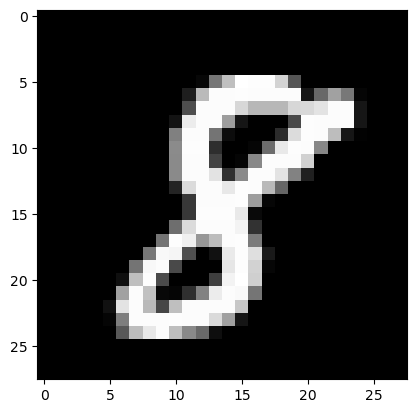

In [17]:
exemplo = x_treino[5281].reshape(28,28,1)
plt.imshow(exemplo, cmap='gray')

In [33]:
exemplo = x_treino[5281].reshape(1, 784)
resposta = modelo.predict(exemplo)
resposta[0]
for i, arr in enumerate(resposta[0]):
    if arr == 1:
        print(f'O número da imagem é {i}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [37]:
resposta[0]

array([6.4858774e-08, 2.7279700e-07, 8.0323002e-09, 9.2212094e-06,
       5.0197297e-13, 3.2507617e-06, 6.7517776e-11, 3.5795369e-10,
       9.9998128e-01, 5.8010933e-06], dtype=float32)

In [32]:
y_treino[5280] 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Observações de aprendizado

Queria deixar um adendo de um detalhe que confundiu minha cabeça, o numero total de iterações por epoch se da no código abaixo:

O modelo avalia a acurácia a cada epoch(ou época, chame do que preferir), e os valores das variaveis que estão sendo alteradas(pesos e bias) mudam a cada iteração dentro do epoch

In [ ]:
batch_size=100
epochs=100

total_de_iteracoes_por_epoch = len(x_treino)/batch_size
total_de_iteracoes = total_de_iteracoes_por_epoch*epochs

# O total de iterações por epoch é o total de vezes em que nosso modelo foi treinado por epoch(epoca), ou seja, o total de vezes em que os valores dos pesos e dos bias foram alterados por epoch
# O total de iterações é o total de vezes que nosso modelo foi treinado
total_de_iteracoes_por_epoch, total_de_iteracoes

(600.0, 60000.0)

A principal vantagem de trabalhar com o gradiente descendente estocástico (SGD) é a flexibilidade de manipular o tamanho dos dados a serem treinados por época (epoch). Em um cenário ideal, o número de iterações seria sempre igual à quantidade de epochs. No entanto, como não temos poder de processamento infinito, precisamos otimizar esse processo, e é aí que o SGD se destaca. Com ele, podemos realizar múltiplas iterações utilizando apenas uma vez a base de dados completa, em vez de ter uma iteração por epoch, ou seja, uma iteração por treinamento na base de dados completa.

Por exemplo, podemos ter 60 iterações usando o conjunto de dados completo apenas uma vez, em vez de ter 1 iteração por epoch. Isso permite um treinamento mais eficiente e rápido. No entanto, o SGD não é perfeito. Se o tamanho do lote (batch size) for muito pequeno, o modelo pode desviar significativamente do caminho ideal, resultando em underfitting. Portanto, é crucial escolher um tamanho de lote apropriado.

Mesmo assim, pequenos desvios em uma iteração podem ser corrigidos na próxima, semelhante ao Andar de um bêbado que eventualmente encontra seu caminho!
<center><img src="./imagens/Gradiente descendente estocastico.png"/></center>

Com ele podemos chegar no local ideal que queremos com menos epochs, ou seja, com menos leituras totais na base de dados

# Gráficos de perfomace

Objetivos: Verificar a presença de underfiting e/ou overfiting

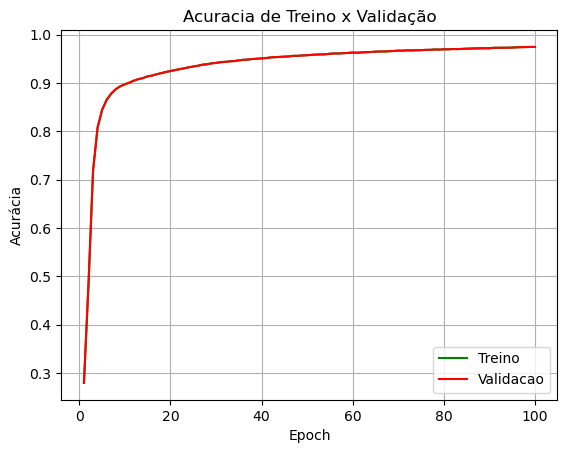

In [ ]:
import matplotlib.pyplot as plt

acc_treino = historico.history['acc']
acc_validation = historico.history['val_acc']

epochs = range(1, len(acc_treino)+1)

plt.plot(epochs, acc_treino, 'g', label='Treino')
plt.plot(epochs, acc_validation, 'r', label='Validacao')
plt.grid(True)
plt.legend()
plt.title('Acuracia de Treino x Validação')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.show()

Tomando com base esse gráfico vemos que aparentemente nosso modelo não está passando pelo processo de overfitting o que é uma boa notícia